# Notebook for Summary, Visualization, and Illustration

## 1. Summary of the Paper

Prediction of in-patient **length of stay (LoS)** is an important and difficult task - as it accounts for about 90% of inter-patient variation in hospital costs in the US, and is also associated with more serious outcomes like infections and fatality. Prediction of good length of stay estimates promises various benefits:
 - Increased accuracy of predictions, which can enable more sophisticated planning strategies.
 - Reduced administrative burden on clinicians,freeing them up to focus on patient care.
 - Improved patient experiences, as patients are more likely to be discharged on time and have a better understanding of their discharge date.
 
However, there are many challenges in gathering the data required and developing models for making these predictions. Rocheteau et al. (2020) proposes a new model - Temporal Pointwise Convolution (TPC) - which aims to mitigate challenges with EHR data, such as data skew, missing data, and irregular sampling. The model claims to provide a significant performance benefit of 18-68% over LSTM networks and Transformers.

## 2. Overview of the Data

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from eICU_preprocessing.reader import eICUReader
from MIMIC_preprocessing.reader import MIMICReader
from eICU_preprocessing.run_all_preprocessing import eICU_path
from MIMIC_preprocessing.run_all_preprocessing import MIMIC_path

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
eICU_path, MIMIC_path

('D:/datasets/eicu/', 'D:/datasets/mimic-iv-0.4/')

In [4]:
eicu_reader = eICUReader(eICU_path + 'train', device = device)
mimic_reader = MIMICReader(MIMIC_path + 'train', device = device)

### 2.1. Length of Stay Distribution

#### 2.1.1. eICU

Data Count:  102749


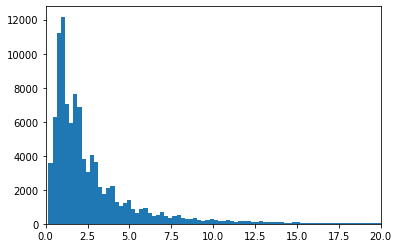

In [5]:
plt.hist(eicu_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(eicu_reader.labels.actualiculos))
plt.show()

#### 2.1.2. MIMIC-IV

Data Count:  48848


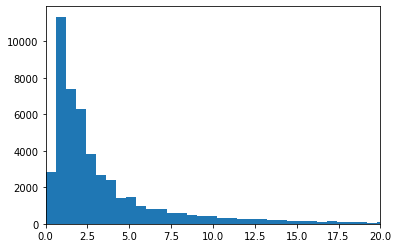

In [6]:
plt.hist(mimic_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(mimic_reader.labels.actualiculos))
plt.show()

MIMIC-IV has less data than eICU, but overall shape is similar.

## 3. Overview of the Methods and Experiments

### 3.1. Code Examples

In [7]:
import time

**TPC Model Type**
 - `tpc` : Temporal Pointwise Convolution
 - `temp_only` : Temporal Convolution Only
 - `pointwise_only` : Pointwise Convolution Only

In [16]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --n_epochs 5
end = time.time()
point_only_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "pointwise_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 224926820,
    "share_weights

In [9]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --n_epochs 5
end = time.time()
temp_only_time = (end - start)
print(f"{(end - start)/60:.2f} min")

 [  36083  120480   81669   47226   27207   16164    9693    6150   11777
     2827]
 [  19358   75529   62553   40585   24249   14845    9342    6133   12331
     3130]
 [  10889   48157   47583   34179   22076   13823    9022    5940   12186
     3585]
 [   6082   30683   35689   28564   19521   12486    8425    5865   12462
     3964]
 [  11139   64777   88339   86675   67932   49940   36024   26480   65027
    25493]
 [   3570   20740   34542   42717   40758   34572   28479   22508   67417
    41525]]
Mean absolute deviation (MAD) = 2.5305967796875333
Mean squared error (MSE) = 30.203414972733878
Mean absolute percentage error (MAPE) = 121.1854665115812
Mean squared logarithmic error (MSLE) = 1.3844580038488983
R^2 Score = 0.17618829573162598
Cohen kappa score = 0.39282584126101616
Epoch: 11 | Train Loss: 87.1060
Validation Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[302681  70323  25425  14768   9385   6328   4865   3452   9074   3641]
 [123121  50298  22193  1503

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "temp_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 4040012702,
    "share_weights": f

In [18]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs 5
end = time.time()
tpc_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1918725804,
    "share_weights": false,


In [21]:
start = time.time()
!python -m models.run_lstm --n_epochs 5
end = time.time()
lstm_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/LSTM",
    "batch_size": 512,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "bidirectional": false,
    "channelwise": false,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "LSTM",
    "hidden_size": 128,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00129,
    "loss": "msle",
    "lstm_dropout_rate": 0.2,
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_layers": 2,
    "name": "LSTM",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "save_results_csv": false,
    "seed": 2601493520,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS"
}
Experiment set up.
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.0208333

In [20]:
start = time.time()
!python -m models.run_transformer --n_epochs 5
end = time.time()
transformer_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/Transformer",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "d_model": 16,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "Transformer",
    "feedforward_size": 256,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00017,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_heads": 2,
    "n_layers": 6,
    "name": "Transformer",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "positional_encoding": false,
    "save_results_csv": false,
    "seed": 2252177438,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS",
    "trans_dropout_rate": 0
}
Experiment set up.
Transformer(
  (relu): ReLU()
  (sigmoid): Sigmoi

 [  2080  10938   7473   7181   6998   4610   2482   1055    643      0]
 [  1309   7875   5859   5774   5819   4129   2299    935    626      0]
 [  2434  19445  17448  19316  20392  16524   8758   4155   2724      0]
 [   968   9513   9561  10938  13551  12017   9033   3697   2410      0]]
Mean absolute deviation (MAD) = 2.7304911556138256
Mean squared error (MSE) = 58.0949820893878
Mean absolute percentage error (MAPE) = 144.08208377939474
Mean squared logarithmic error (MSLE) = 1.5848122180484712
R^2 Score = 0.0580960644111822
Cohen kappa score = 0.2965223303513276
Epoch: 0 | Validation Loss: 98.9145
Train Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[947961 899881 140182  54854  26367  13760   7552   4428   7123    895]
 [364964 577977 145914  67939  34887  18737  10501   6368   9896   1268]
 [156152 340869 118195  61748  33727  19114  11086   6586  11013   1503]
 [ 76025 208250  91303  52760  30499  17827  10521   6408  10831   1606]
 [ 41719 134801  69713  43751  

## 4. Summary of the Key Results

In [42]:
# TODO: Get automatically
tpc_path = r'D:\git\cs598_replication_tpc_los_prediction\models\experiments\eICU\LoS\TPC\2023-04-15_1825551'
temp_path = r'D:\git\cs598_replication_tpc_los_prediction\models\experiments\eICU\LoS\TPC\2023-04-15_0857501'
pointwise_path = r'D:\git\cs598_replication_tpc_los_prediction\models\experiments\eICU\LoS\TPC\2023-04-15_1715301'
lstm_path = r'D:\git\cs598_replication_tpc_los_prediction\models\experiments\eICU\LoS\LSTM\2023-04-15_2207421'
transformers_path = r'D:\git\cs598_replication_tpc_los_prediction\models\experiments\eICU\LoS\Transformer\2023-04-15_2056131'

In [43]:
import json
with open(tpc_path + "\\result\\results.json") as f: tpc_results = json.load(f)
with open(temp_path + "\\result\\results.json") as f: temp_results = json.load(f)
with open(pointwise_path + "\\result\\results.json") as f: pointwise_results = json.load(f)
with open(lstm_path + "\\result\\results.json") as f: lstm_results = json.load(f)
with open(transformers_path + "\\result\\results.json") as f: transformers_results = json.load(f)

### MSLE (Mean Square Logarithmic Error)

Text(0.5, 1.0, 'Validation MSLE')

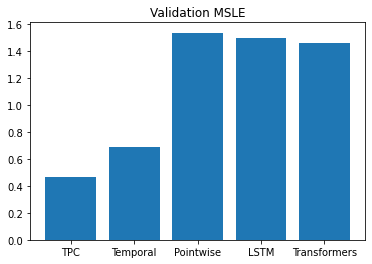

In [46]:
plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
        [tpc_results["val_msle"], temp_results["val_msle"], pointwise_results["val_msle"], lstm_results["val_msle"], transformers_results["val_msle"]])
plt.title("Validation MSLE")

### Time Performance Analysis

In [51]:
torch.__version__

'1.9.1+cu111'

In [48]:
torch.cuda.is_available()

True

Text(0.5, 1.0, 'Execution Time (min)')

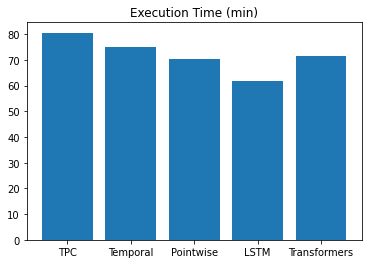

In [47]:
plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
        np.array([tpc_time, temp_only_time, point_only_time, lstm_time, transformer_time])/60)
plt.title("Execution Time (min)")

## References
 - https://dl.acm.org/doi/10.1145/3450439.3451860
 - https://github.com/EmmaRocheteau/TPC-LoS-prediction
 - https://github.com/EmmaRocheteau/MIMIC-IV-Postgres
 - https://github.com/MIT-LCP/mimic-code/
 - https://github.com/MIT-LCP/mimic-iv/